In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
IMAGE_SIZE = 256
CHANNELS = 3

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range = 40
)

train_generator = train_datagen.flow_from_directory(
    'Tomato/dataset/train',
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = 32,
    class_mode = 'sparse'
)

Found 5297 images belonging to 5 classes.


In [25]:
train_generator.class_indices

{'Bacterial_spot': 0,
 'Healthy': 1,
 'Septoria_leaf_spot': 2,
 'Two-spotted_spider_mite': 3,
 'Yellow_Leaf_Curl_Virus': 4}

In [26]:
class_names = list(train_generator.class_indices.keys())
class_names

['Bacterial_spot',
 'Healthy',
 'Septoria_leaf_spot',
 'Two-spotted_spider_mite',
 'Yellow_Leaf_Curl_Virus']

In [4]:
validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range = 40
)

validation_generator = validation_datagen.flow_from_directory(
    'Tomato/dataset/val',
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = 32,
    class_mode = 'sparse'
)

Found 755 images belonging to 5 classes.


In [5]:
test_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range = 40
)

test_generator = test_datagen.flow_from_directory(
    'Tomato/dataset/test',
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = 32,
    class_mode = 'sparse'
)

Found 1519 images belonging to 5 classes.


In [7]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 5

model = models.Sequential([
    layers.InputLayer(input_shape = input_shape),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [9]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [10]:
5297/32

165.53125

In [11]:
755/32

23.59375

In [13]:
history = model.fit(
    train_generator,
    steps_per_epoch = 165,
    batch_size=32,
    validation_data = validation_generator,
    validation_steps = 23,
    verbose = 1,
    epochs = 10
)

Epoch 1/10
165/165 [==============================] - 478s 3s/step - loss: 1.2314 - accuracy: 0.4815 - val_loss: 1.1481 - val_accuracy: 0.5435
Epoch 2/10
165/165 [==============================] - 596s 4s/step - loss: 0.7958 - accuracy: 0.6876 - val_loss: 0.5681 - val_accuracy: 0.7976
Epoch 3/10
165/165 [==============================] - 646s 4s/step - loss: 0.5243 - accuracy: 0.8049 - val_loss: 0.5869 - val_accuracy: 0.7921
Epoch 4/10
165/165 [==============================] - 723s 4s/step - loss: 0.3671 - accuracy: 0.8638 - val_loss: 0.2477 - val_accuracy: 0.9035
Epoch 5/10
165/165 [==============================] - 608s 4s/step - loss: 0.2833 - accuracy: 0.8938 - val_loss: 0.2868 - val_accuracy: 0.8899
Epoch 6/10
165/165 [==============================] - 470s 3s/step - loss: 0.2272 - accuracy: 0.9174 - val_loss: 0.1724 - val_accuracy: 0.9307
Epoch 7/10
165/165 [==============================] - 516s 3s/step - loss: 0.2615 - accuracy: 0.9058 - val_loss: 0.1439 - val_accuracy: 0.9484

In [14]:
scores = model.evaluate(test_generator)

48/48 [==============================] - 47s 982ms/step - loss: 0.1905 - accuracy: 0.9282


In [15]:
scores

[0.19049988687038422, 0.9282422661781311]

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

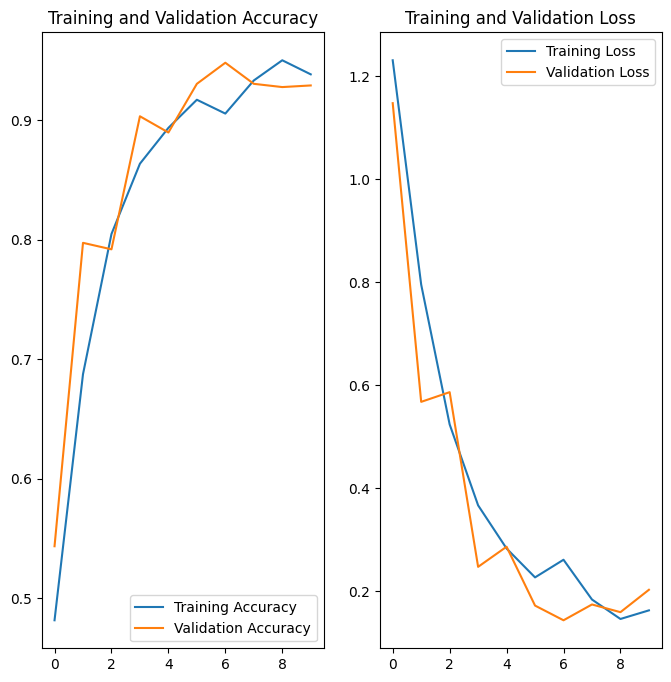

In [20]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(10), acc, label='Training Accuracy')
plt.plot(range(10), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(10), loss, label='Training Loss')
plt.plot(range(10), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Yellow_Leaf_Curl_Virus
1/1 [==============================] - 0s 362ms/step
predicted label: Yellow_Leaf_Curl_Virus


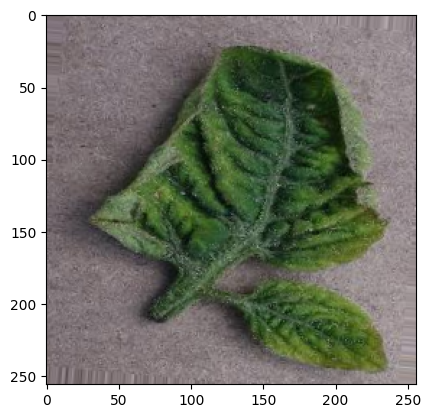

In [31]:
import numpy as np
for images_batch, labels_batch in test_generator:
    
    first_image = images_batch[0]
    first_label = int(labels_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:", class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:", class_names[np.argmax(batch_prediction[0])])
    
    break

In [32]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 38ms/step


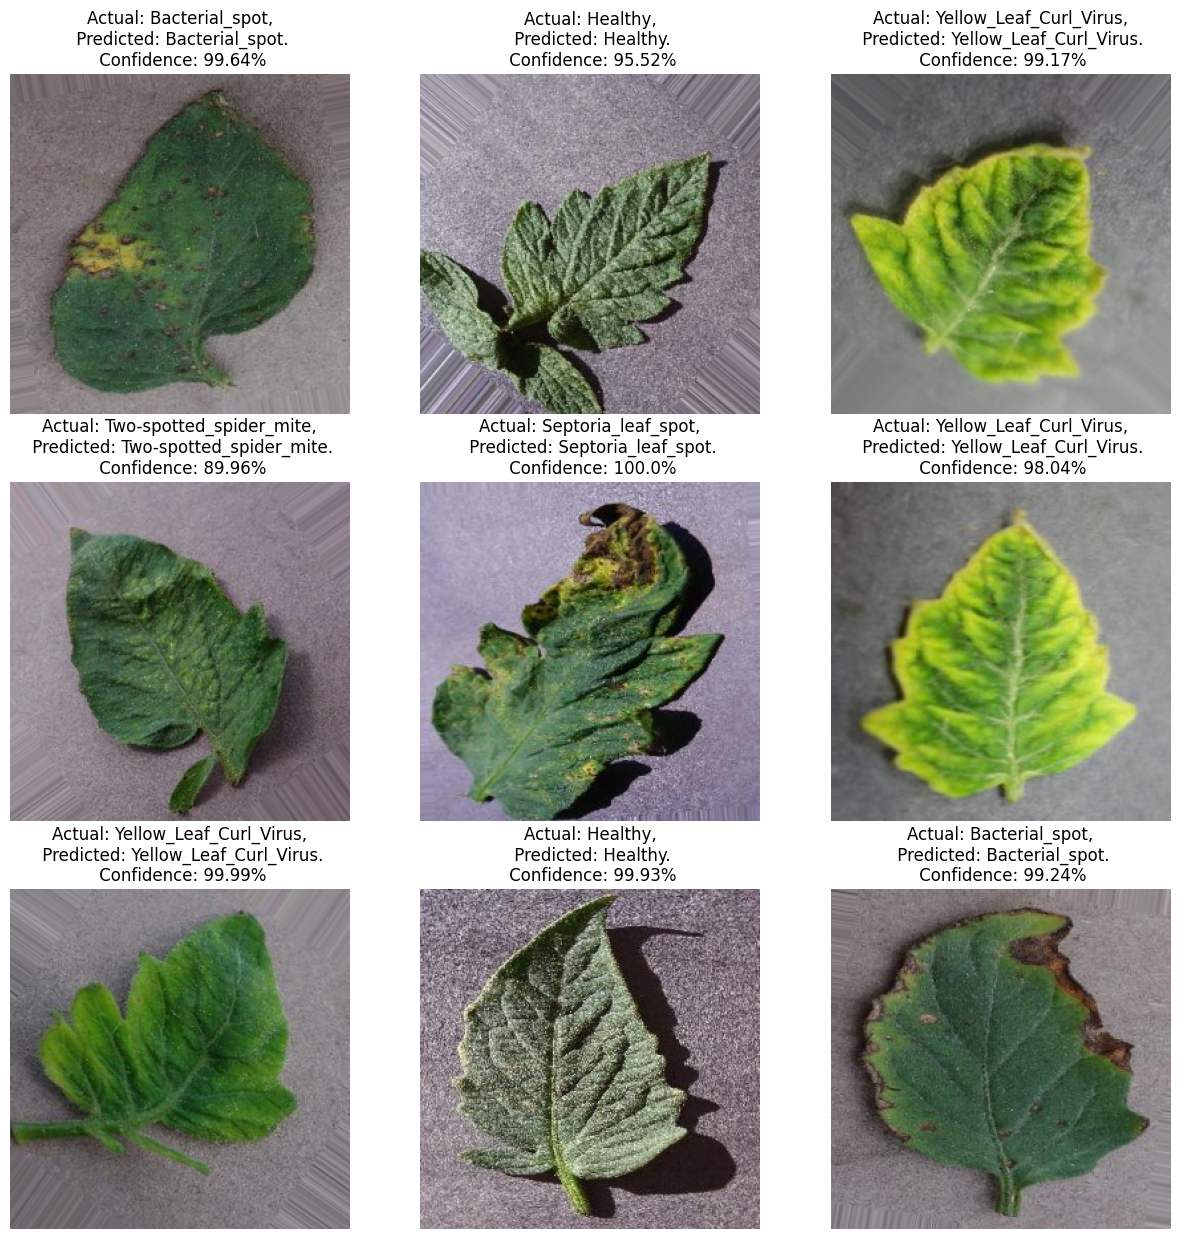

In [38]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [39]:
model.save("tomatoes.h5")